In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/RotationCurveFit.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_info = gen_dataInfo_from_tfCube( sini=0.5, 
                                      vcirc=200., 
                                      redshift=0.6, 
                                      slitAngles=np.array([-np.pi/3., -np.pi/4.,-np.pi/6., -np.pi/18., 0., np.pi/18., np.pi/6., np.pi/4., np.pi/3.])
                                    )

redshift : 0.6
half_light_radius : 0.5
vcirc : 200.0
sini : 0.5
slitWidth : 0.02
slitAngles : [-1.04719755 -0.78539816 -0.52359878 -0.17453293  0.          0.17453293
  0.52359878  0.78539816  1.04719755]


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 4.866625070571899 (sec)
total getSlitSpectra time: 9.802381992340088 (sec)


In [3]:
N = len(data_info['par_fid']['slitAngles'])
slitAngle_arr = np.zeros(N)
vcirc_arr = np.zeros(N)

for j, angle in enumerate(data_info['par_fid']['slitAngles']):
    
    ### make data_info_j ###
    data_info_j = data_info.copy()
    del data_info_j['data_list']
    data_info_j['data'] = data_info['data_list'][j]
    
     
    ### fit data_info into RotationCurveFit ###
    RotFit_j = RotationCurveFit(data_info_j, active_par_key = ['vscale', 'r_0', 'vcirc', 'v_0'])
    #RotFit_j = RotationCurveFit(all_data_info[angle], active_par_key = ['vscale', 'r_0', 'vcirc', 'v_0', 'redshift'])
    parRot_opt_j = RotFit_j.optFit_rotation_curve(RotFit_j.gaussfit_peakLambda)
    slitAngle_arr[j] = angle
    vcirc_arr[j] = parRot_opt_j['v_a']

time cost in gaussFit_spec2D: 0.15127015113830566 (secs)
time cost in gaussFit_spec2D: 0.16987395286560059 (secs)
time cost in gaussFit_spec2D: 0.17088580131530762 (secs)
time cost in gaussFit_spec2D: 0.17187976837158203 (secs)
time cost in gaussFit_spec2D: 0.1737360954284668 (secs)
time cost in gaussFit_spec2D: 0.17269182205200195 (secs)
time cost in gaussFit_spec2D: 0.16948580741882324 (secs)
time cost in gaussFit_spec2D: 0.16498279571533203 (secs)
time cost in gaussFit_spec2D: 0.16261911392211914 (secs)


In [6]:
vcirc_arr

array([ 89.43446235, 130.92408352, 166.40978047, 195.98946525,
       200.01151562, 195.98958945, 166.40910461, 130.92350237,
        89.43595995])

In [13]:
slitAngle_arr

array([-1.04719755, -0.78539816, -0.52359878, -0.17453293,  0.        ,
        0.17453293,  0.52359878,  0.78539816,  1.04719755])

In [11]:
def find_phi(slitAngle, sini):
    cosi = np.sqrt(1-sini**2)
    phi = np.arctan(np.tan(slitAngle)/cosi)
    return phi

In [22]:
phi_arr = find_phi(slitAngle_arr, sini=0.5)
phi_arr

array([-1.10714872, -0.85707195, -0.5880026 , -0.20085936,  0.        ,
        0.20085936,  0.5880026 ,  0.85707195,  1.10714872])

Text(0.5, 0, 'slit angle')

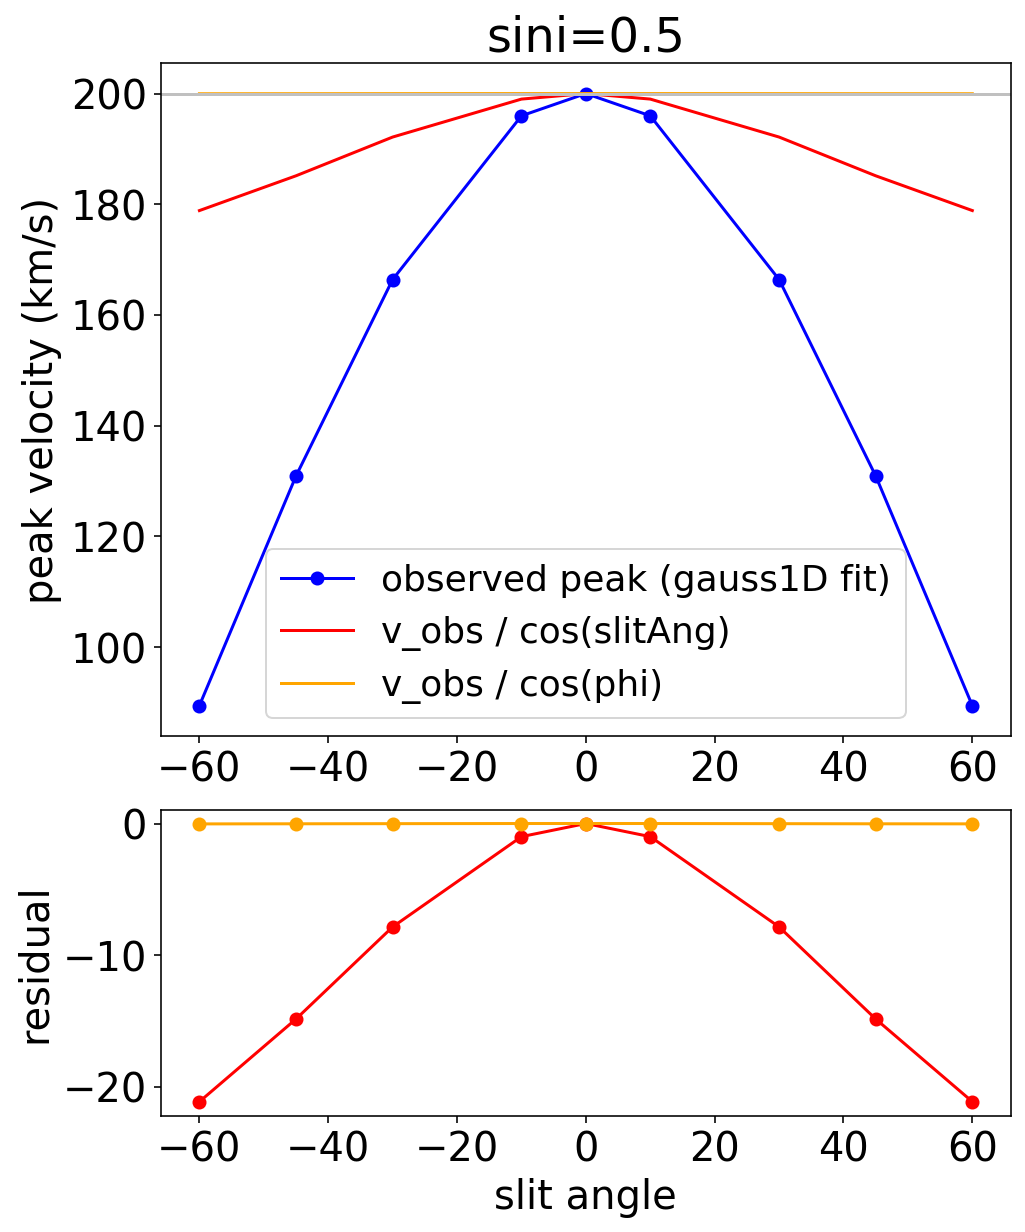

In [25]:
fig = plt.figure(figsize=(7.2,8.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.42,0.82,0.55])
ax2=fig.add_axes([0.16,0.11,0.82,0.25])

slitAngle_arr_deg = slitAngle_arr/np.pi*180.

ax1.plot(slitAngle_arr_deg,vcirc_arr,label='observed peak (gauss1D fit)',color='blue',marker='o')
ax1.plot(slitAngle_arr_deg,vcirc_arr/np.cos(slitAngle_arr),label='v_obs / cos(slitAng)',color='red',ls="-")

ax1.plot(slitAngle_arr_deg,vcirc_arr/np.cos(phi_arr),label='v_obs / cos(phi)',color='orange',ls="-")


ax1.axhline(y=200.,color='silver',ls="-")


ax2.plot(slitAngle_arr_deg,vcirc_arr/np.cos(slitAngle_arr)-200.,label='residual',color='r',marker='o')
ax2.plot(slitAngle_arr_deg,vcirc_arr/np.cos(phi_arr)-200.,label='residual\ good\ corr',color='orange',marker='o')


ax1.legend(loc='best',prop={'size':18})

ax1.set_title('sini=0.5')
ax1.set_ylabel('peak velocity (km/s)')
ax2.set_ylabel('residual')
ax2.set_xlabel('slit angle')

Text(0.5, 0, 'slit angle')

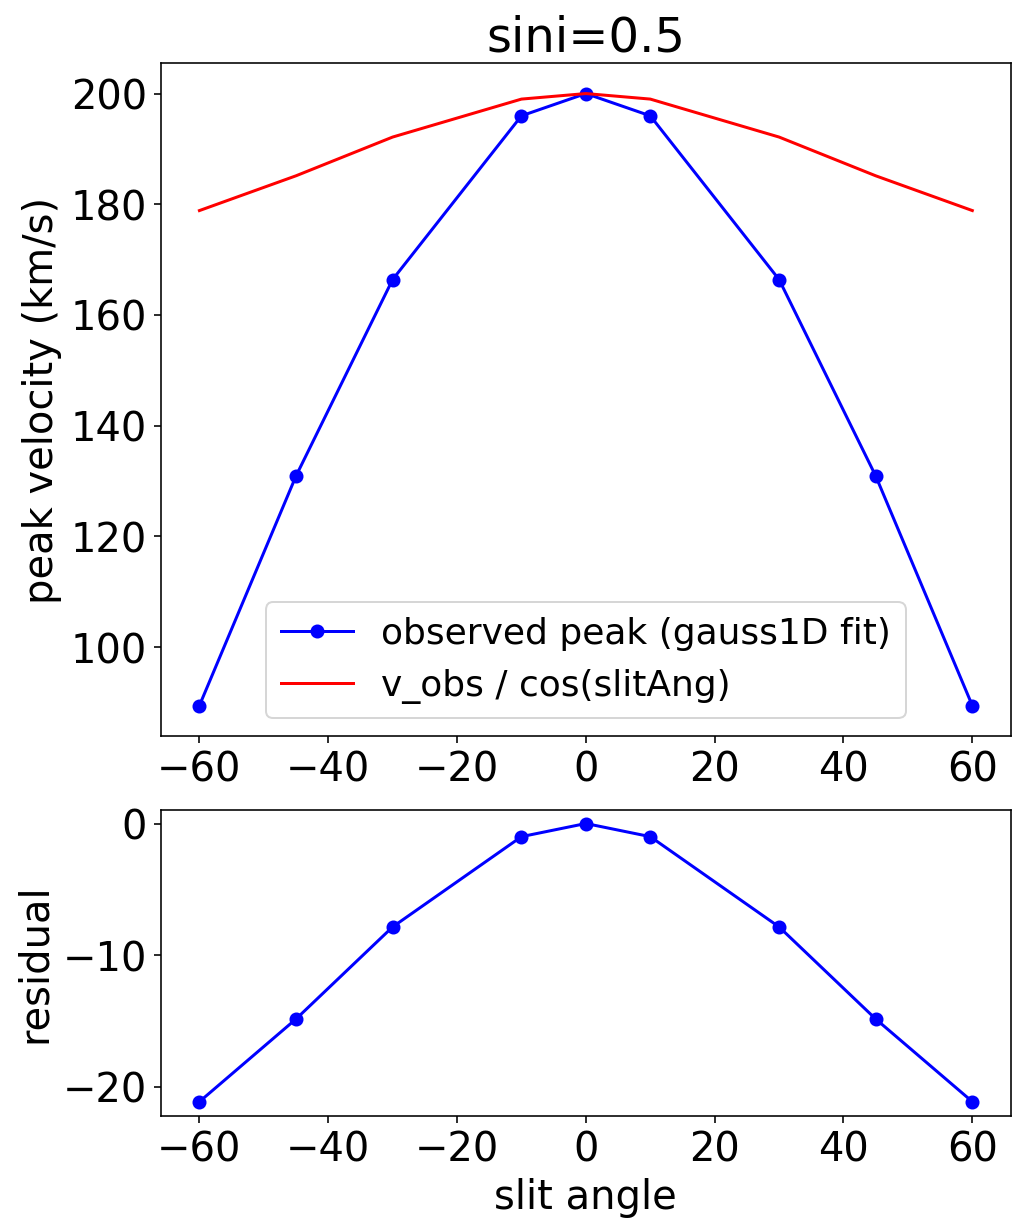

In [10]:
fig = plt.figure(figsize=(7.2,8.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.42,0.82,0.55])
ax2=fig.add_axes([0.16,0.11,0.82,0.25])

slitAngle_arr_deg = slitAngle_arr/np.pi*180.

ax1.plot(slitAngle_arr_deg,vcirc_arr,label='observed peak (gauss1D fit)',color='blue',marker='o')
ax1.plot(slitAngle_arr_deg,vcirc_arr/np.cos(slitAngle_arr),label='v_obs / cos(slitAng)',color='red',ls="-")

ax2.plot(slitAngle_arr_deg,vcirc_arr/np.cos(slitAngle_arr)-200.,label='residual',color='blue',marker='o')

ax1.legend(loc='best',prop={'size':18})

ax1.set_title('sini=0.5')
ax1.set_ylabel('peak velocity (km/s)')
ax2.set_ylabel('residual')
ax2.set_xlabel('slit angle')

Text(0.5, 0, 'slit angle')

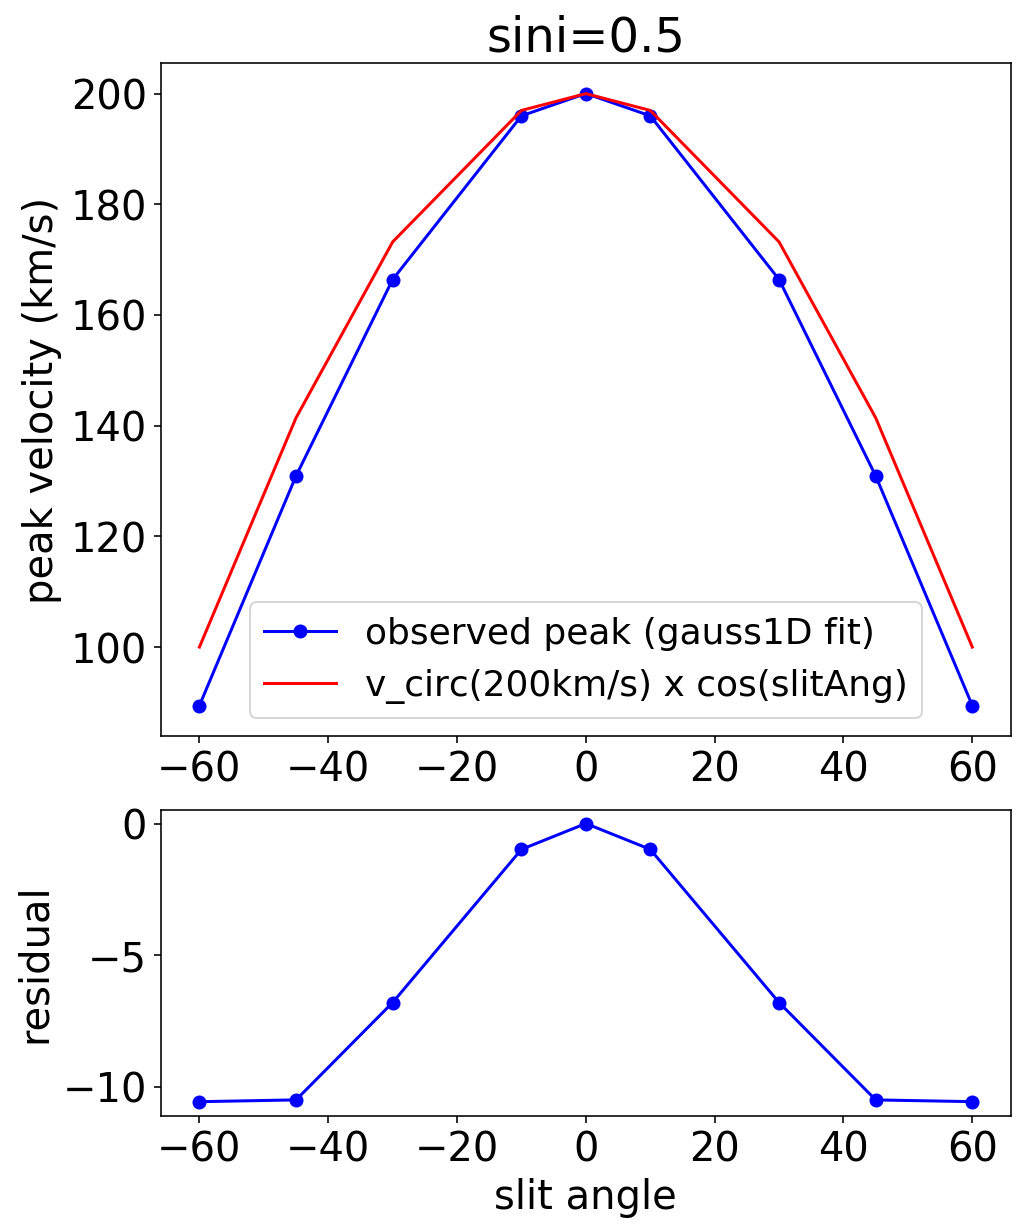

In [8]:
fig = plt.figure(figsize=(7.2,8.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.42,0.82,0.55])
ax2=fig.add_axes([0.16,0.11,0.82,0.25])

slitAngle_arr_deg = slitAngle_arr/np.pi*180.

ax1.plot(slitAngle_arr_deg,vcirc_arr,label='observed peak (gauss1D fit)',color='blue',marker='o')
ax1.plot(slitAngle_arr_deg,200.*np.cos(slitAngle_arr),label='v_circ(200km/s) x cos(slitAng)',color='red',ls="-")

ax2.plot(slitAngle_arr_deg,vcirc_arr-200.*np.cos(slitAngle_arr),label='residual',color='blue',marker='o')

ax1.legend(loc='best',prop={'size':18})

ax1.set_title('sini=0.5')
ax1.set_ylabel('peak velocity (km/s)')
ax2.set_ylabel('residual')
ax2.set_xlabel('slit angle')

In [7]:
vcirc_arr-200.*np.cos(slitAngle_arr)

array([-10.56553765, -10.49727272,  -6.79530029,  -0.97208535,
         0.01151562,  -0.97196116,  -6.79597615, -10.49785387,
       -10.56404005])

Text(0.5, 0, 'slit angle')

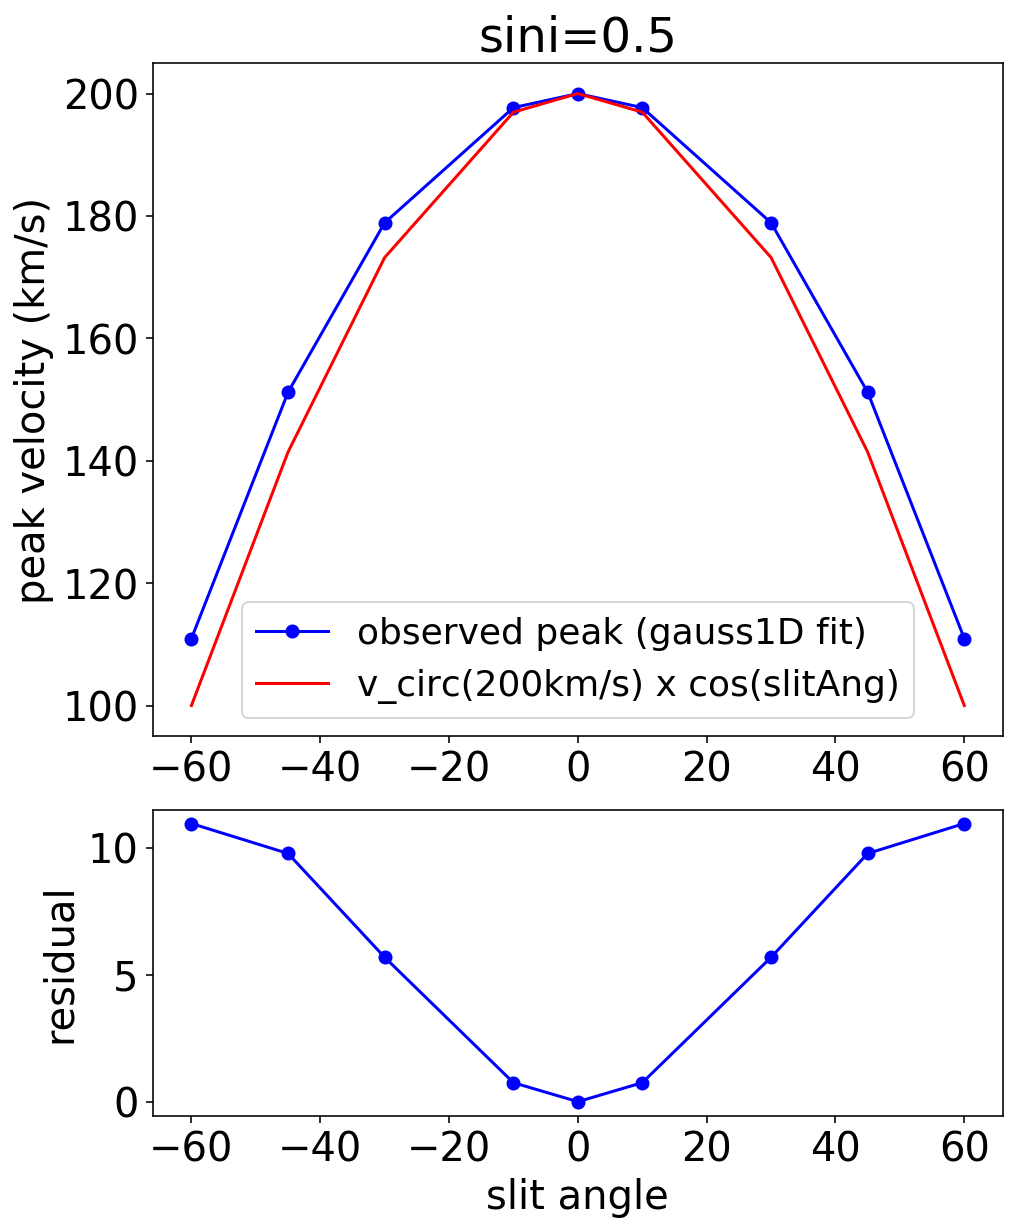

In [6]:
fig = plt.figure(figsize=(7.2,8.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.42,0.82,0.55])
ax2=fig.add_axes([0.16,0.11,0.82,0.25])

slitAngle_arr_deg = slitAngle_arr/np.pi*180.

ax1.plot(slitAngle_arr_deg,vcirc_arr,label='observed peak (gauss1D fit)',color='blue',marker='o')
ax1.plot(slitAngle_arr_deg,200.*np.cos(slitAngle_arr),label='v_circ(200km/s) x cos(slitAng)',color='red',ls="-")

ax2.plot(slitAngle_arr_deg,vcirc_arr-200.*np.cos(slitAngle_arr),label='residual',color='blue',marker='o')


ax1.legend(loc='best',prop={'size':18})

ax1.set_title('sini=0.5')
ax1.set_ylabel('peak velocity (km/s)')
ax2.set_ylabel('residual')
ax2.set_xlabel('slit angle')

In [ ]:
# tend to over estimate v_circ if using the formula to correct for sligAng. effect
# v_obs = v_circ* cos(delta_PA)

In [7]:
data_info = gen_dataInfo_from_tfCube(sini=0.1, 
                                     vcirc=200., 
                                     redshift=0.6, 
                                     slitAngles=np.array([-np.pi/3., -np.pi/4.,-np.pi/6., -np.pi/18., 0., np.pi/18., np.pi/6., np.pi/4., np.pi/3.])
                                    )

redshift : 0.6
half_light_radius : 0.5
vcirc : 200.0
sini : 0.1
slitWidth : 0.02
slitAngles : [-1.04719755 -0.78539816 -0.52359878 -0.17453293  0.          0.17453293
  0.52359878  0.78539816  1.04719755]


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 4.63177490234375 (sec)
total getSlitSpectra time: 10.019686937332153 (sec)


In [8]:
N = len(data_info['par_fid']['slitAngles'])
slitAngle_arr = np.zeros(N)
vcirc_arr = np.zeros(N)

for j, angle in enumerate(data_info['par_fid']['slitAngles']):
    
    ### make data_info_j ###
    data_info_j = data_info.copy()
    del data_info_j['data_list']
    data_info_j['data'] = data_info['data_list'][j]
    
     
    ### fit data_info into RotationCurveFit ###
    RotFit_j = RotationCurveFit(data_info_j, active_par_key = ['vscale', 'r_0', 'vcirc', 'v_0'])
    #RotFit_j = RotationCurveFit(all_data_info[angle], active_par_key = ['vscale', 'r_0', 'vcirc', 'v_0', 'redshift'])
    parRot_opt_j = RotFit_j.optFit_rotation_curve(RotFit_j.gaussfit_peakLambda)
    slitAngle_arr[j] = angle
    vcirc_arr[j] = parRot_opt_j['v_a']

time cost in gaussFit_spec2D: 0.14556479454040527 (secs)
time cost in gaussFit_spec2D: 0.16229510307312012 (secs)
time cost in gaussFit_spec2D: 0.1728348731994629 (secs)
time cost in gaussFit_spec2D: 0.1636950969696045 (secs)
time cost in gaussFit_spec2D: 0.17229676246643066 (secs)
time cost in gaussFit_spec2D: 0.17088794708251953 (secs)
time cost in gaussFit_spec2D: 0.16284584999084473 (secs)
time cost in gaussFit_spec2D: 0.15996503829956055 (secs)
time cost in gaussFit_spec2D: 0.1568148136138916 (secs)


Text(0.5, 0, 'slit angle')

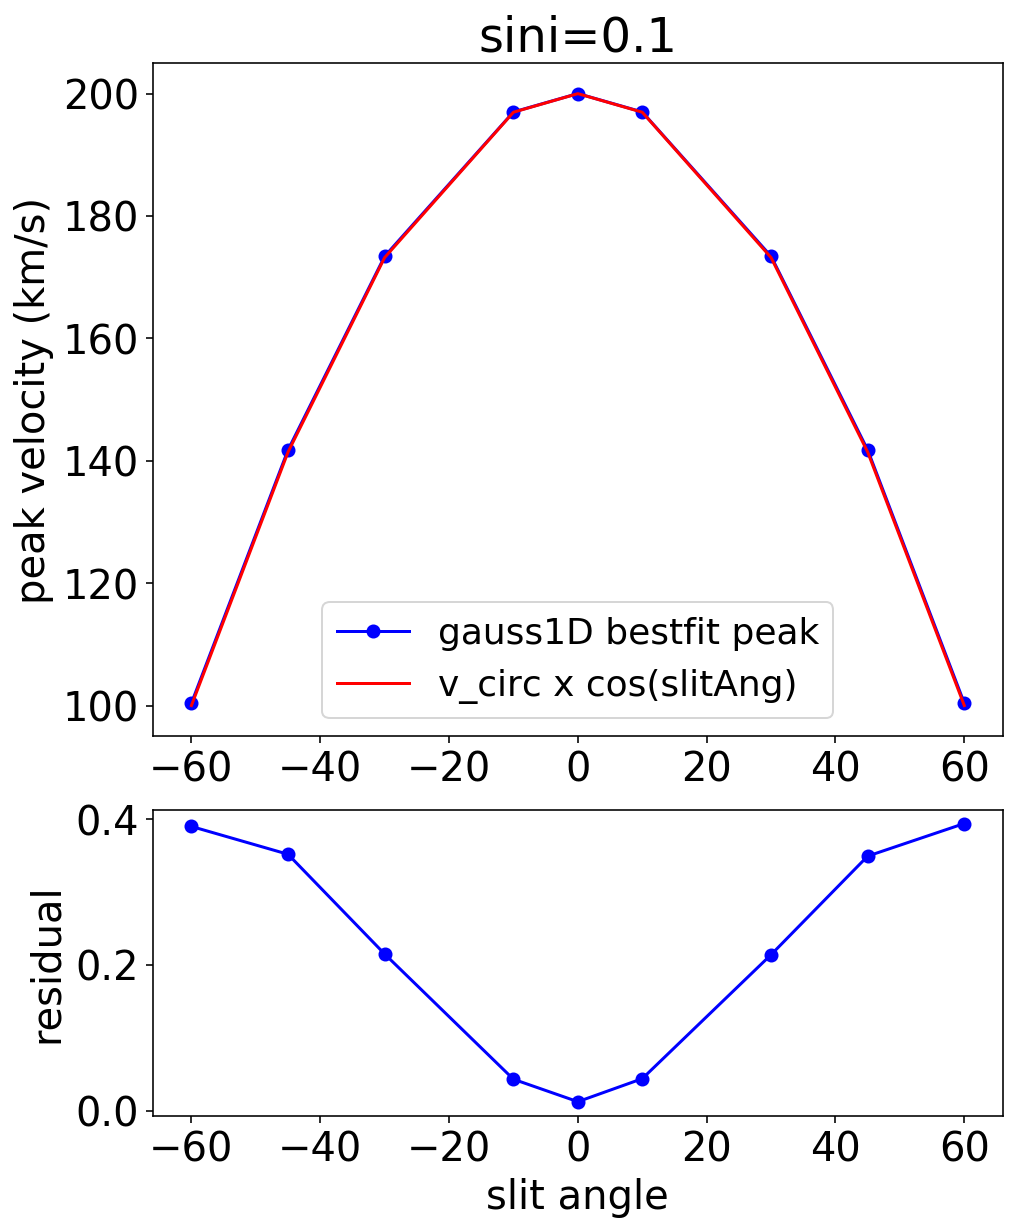

In [9]:
fig = plt.figure(figsize=(7.2,8.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.42,0.82,0.55])
ax2=fig.add_axes([0.16,0.11,0.82,0.25])

slitAngle_arr_deg = slitAngle_arr/np.pi*180.

ax1.plot(slitAngle_arr_deg,vcirc_arr,label='gauss1D bestfit peak',color='blue',marker='o')
ax1.plot(slitAngle_arr_deg,200.*np.cos(slitAngle_arr),label='v_circ x cos(slitAng)',color='red',ls="-")

ax2.plot(slitAngle_arr_deg,vcirc_arr-200.*np.cos(slitAngle_arr),label='residual',color='blue',marker='o')


ax1.legend(loc='best',prop={'size':18})

ax1.set_title('sini=0.1')
ax1.set_ylabel('peak velocity (km/s)')
ax2.set_ylabel('residual')
ax2.set_xlabel('slit angle')